## Intermediate Data Science

#### University of Redlands - DATA 201
#### Jesus Plascencia
#### November 9th 2025
#### Purpose: To practice Dynamic Webscraping and find out which Financial market is the most prominent.  




In [1]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages|
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

/opt/anaconda3/lib/python3.12/site-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [2]:
!pip install selenium webdriver-manager


In [3]:
import requests
from bs4 import BeautifulSoup

# For dynamic sites using chrome
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time

---------------
## Web Scraping - Day10 HW

FREE FORM!!!

See if you can find a website that interests you, scrape some information from that site, see if you can learn something interesting.

For example:

Try scraping a job website using the job name/keyword and location that you are interested in. Can you create a data frame with job title, location, pay, etc? 


**NOTE** Just for fun I included an example of a job search wordcloud visualization that I coded up a few years ago. Check it out.


Your final notebooks should:

- [ ] Be a completely new notebook with just the Day9 stuff in it NO YOU TRY: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

**Remember to Proof Read and Proof Run your code** Restart the kernel and go through it all once before submitting.

### I Wanted To practice Scraping Wikipedia Tables
I Got this data from [Wikipedia](https://en.wikipedia.org/wiki/List_of_major_stock_exchanges), which shows Monthly Trade Volume up to October 2025. My objective with doing this was to explore if specific financial markets have higher trade volumes. I initially tried scraping Wiki as a static website and was met with a clear message that I am doing it wrong. I switched to the dynamic webscraping process and was able to get the table smoothly. 

In this brief exploratory analysis, I found that the NYSe is not the number 1 financial market in the world. It is actually Shenzen (not my a large margin). Shenzen is a Special Economic Zone in China. Infact, it serves as one of the best examples that Special Economic Zones do help struggling cities reach financial stability. Closely following Shenzens Stock Exchange we have Nasdaq and the NYSE which is not surprising. 

Steps to Web Scraping 1) Get the URL 2)Request 3) Soup 4) Find 

In [4]:
URL = "https://en.wikipedia.org/wiki/List_of_major_stock_exchanges"
page = requests.get(URL)

options = Options() #Specify my options to make sure browser works
options.add_argument("--headless=new")

service = Service(ChromeDriverManager().install()) #Define the service, im using chrome driver
driver = webdriver.Chrome(service=service,options=options)

driver.get(URL) # Open the driver and get the webpage to render

html_source_code = driver.execute_script("return document.body.innerHTML;")  # I grab the HTML source code and send it to beautifulSoup
soup = BeautifulSoup(html_source_code, 'html.parser')

driver.quit()

In [5]:
table1 = soup.find_all('table', class_="wikitable sortable jquery-tablesorter")

In [7]:
table_str = str(table1) # Now it looks like a website
df = pd.read_html(table_str)

df = df[0] #Gives me the first table

/var/folders/5p/rm6_wrvj0c54zq3c705yq1xr0000gn/T/ipykernel_15238/2675801270.py:2: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [11]:
df.head(10)

Stock exchange  \
                                Stock exchange   
0                      New York Stock Exchange   
1                                  Nasdaq (US)   
2                      Shanghai Stock Exchange   
3  Japan Exchange Group (Tokyo Stock Exchange)   
4                     Hong Kong Stock Exchange   
5                                     Euronext   
6                        Bombay Stock Exchange   
7                      National Stock Exchange   
8                      Shenzhen Stock Exchange   
9                       Toronto Stock Exchange   

                                  MIC         Region  \
                                  MIC         Region   
0                                XNYS  United States   
1                                XNAS  United States   
2                                XSHG          China   
3                          XJPX (TYO)          Japan   
4                                XHKG      Hong Kong   
5  XAMS XBRU XMSM XLIS XMIL XOSL XPAR         Europe   
6                                XBSE          India   
7                                XNSE          India   
8                                XSHE          China   
9                                XTSE         Canada   

                                                City Market cap (USD tn)  \
                                                City Market cap (USD tn)   
0                                      New York City            30.92[4]   
1                                      New York City            31.96[5]   
2                                           Shanghai             7.96[6]   
3                                              Tokyo             7.06[7]   
4                                          Hong Kong             6.41[8]   
5  Amsterdam Brussels Dublin Lisbon Milan Oslo Paris             5.61[9]   
6                                             Mumbai            5.25[10]   
7                                             Mumbai            5.32[11]   
8                                           Shenzhen            5.11[12]   
9                                            Toronto            4.00[13]   

  Monthly trade volume (USD bn) Time zone      Δ      DST  \
  Monthly trade volume (USD bn) Time zone      Δ      DST   
0                          2685   EST/EDT  −5:00  Mar–Nov   
1                          2727   EST/EDT  −5:00  Mar–Nov   
2                          1906       CST  +8:00      NaN   
3                           652       JST  +9:00      NaN   
4                           762       HKT  +8:00      NaN   
5                           186  CET/CEST  +1:00  Mar–Oct   
6                           501       IST  +5:30      NaN   
7                           294       IST  +5:30      NaN   
8                          2888       CST  +8:00      NaN   
9                           206   EST/EDT  −5:00  Mar–Nov   

  Open hours (local time)                     UTC, winter only         
                     Open  Close        Lunch             Open  Close  
0                   09:30  16:00           No            14:30  21:00  
1                   09:30  16:00           No            14:30  21:00  
2                   09:30  15:00  11:30–13:00            01:30  07:00  
3                   09:00  15:00  11:30–12:30            00:00  06:00  
4                   09:30  16:00  12:00–13:00            01:30  08:00  
5                   09:00  17:30           No            08:00  16:30  
6                   09:15  15:30           No            03:45  10:00  
7                   09:15  15:30           No            03:45  10:00  
8                   09:30  15:00  11:30–13:00            01:30  07:00  
9                   09:30  16:00           No            14:30  21:00

In [12]:
list(df.columns)

[('Stock exchange', 'Stock exchange'),
 ('MIC', 'MIC'),
 ('Region', 'Region'),
 ('City', 'City'),
 ('Market cap (USD\xa0tn)', 'Market cap (USD\xa0tn)'),
 ('Monthly trade volume (USD\xa0bn)', 'Monthly trade volume (USD\xa0bn)'),
 ('Time zone', 'Time zone'),
 ('Δ', 'Δ'),
 ('DST', 'DST'),
 ('Open hours (local time)', 'Open'),
 ('Open hours (local time)', 'Close'),
 ('Open hours (local time)', 'Lunch'),
 ('UTC, winter only', 'Open'),
 ('UTC, winter only', 'Close')]

In [18]:
df_sorted = df.sort_values(('Monthly trade volume (USD\xa0bn)','Monthly trade volume (USD\xa0bn)'), ascending=False)


In [20]:
top_10 = df_sorted.head(10)


The code below is how I avoided removing the duplicate columns explicitly. I first sort the column and then move the sorted values into a dictionary so that I can convert it to a dataframe. This lets me visualize the data easily without having to explicitly remove the duplicate columns.  

In [23]:
for_graph = {'stock_exchange':top_10['Stock exchange', 'Stock exchange'].to_list(),
               'monthly_trade_volume':top_10['Monthly trade volume (USD\xa0bn)','Monthly trade volume (USD\xa0bn)'].to_list()}
df_final = pd.DataFrame(for_graph)
df_final

,stock_exchange,monthly_trade_volume
0,Shenzhen Stock Exchange,2888
1,Nasdaq (US),2727
2,New York Stock Exchange,2685
3,Shanghai Stock Exchange,1906
4,Hong Kong Stock Exchange,762
5,Japan Exchange Group (Tokyo Stock Exchange),652
6,Bombay Stock Exchange,501
7,National Stock Exchange,294
8,Taiwan Stock Exchange,222
9,London Stock Exchange,219


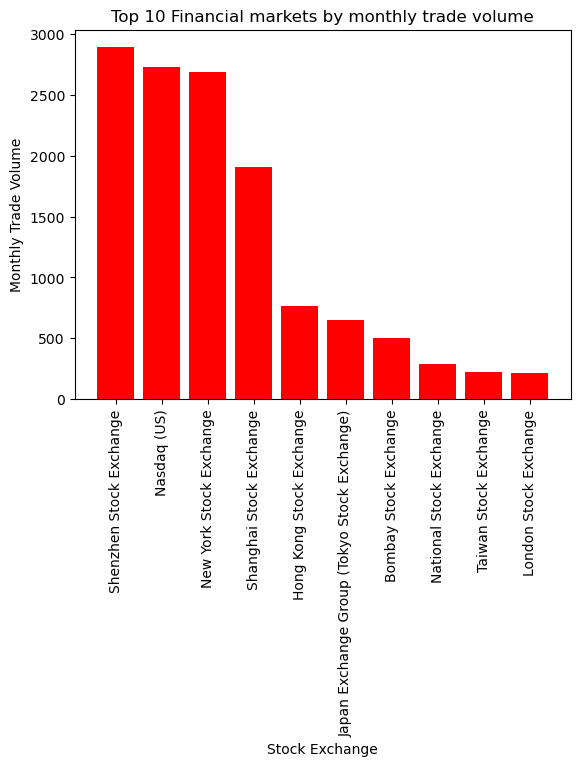

In [25]:
plt.bar(df_final['stock_exchange'], df_final['monthly_trade_volume'], color='r')
plt.title('Top 10 Financial markets by monthly trade volume')
plt.xlabel('Stock Exchange')
plt.ylabel('Monthly Trade Volume')
plt.xticks(rotation = 90)
plt.tight_layout

plt.show()